## Cohort2: Survival vs. Death

- data loading

In [1]:
import pandas as pd
import numpy as np

df_albumin_clean = pd.read_excel('/home/mailiyi/Poisoning_Prediction/all_poisoning_data_wide_clean_albumin_20251106.xlsx')

In [2]:
features_categorical = ['Gender',
 'Education Level',
 'Type of Poisoning',
 'Hypertension',
 'Hyperlipidemia',
 'Diabetes Mellitus',
 'Cerebrovascular Disease',
 'Heart Disease',
 'Allergy History',
 'Cancer',
 'Poisoning',
 'degree of poisoning',
 'Smoking Status',
 'Alcohol Consumption Status',
 'Shortness of Breath',
 'Chest Pain',
 'Cough',
 'Pre-syncope',
 'Altered Consciousness or Syncope',
 'Sore Throat',
 'Fever',
 'Fatigue',
 'Lower Limb Edema',
 'Palpitations',
 'Vomiting',
 'Nausea',
 'Weakness',
 'Headache',
 'Residence']

In [3]:
value_mappings_en = {
    "Gender": {
        1: "Male",
        0: "Female"
    },
    "Education Level": {
        1: "Illiterate",
        2: "Primary School",
        3: "Junior High School",
        4: "Senior High School",
        5: "University Degree"
    },
    "Type of Poisoning": {
        1: "Industrial",
        2: "Pharmaceutical",
        3: "Pesticide",
        4: "Alcohol",
        0: "Uncertain"
    },
    "Hypertension": {
        1: "Yes",
        0: "No"
    },
    "Hyperlipidemia": {
        1: "Yes",
        0: "No"
    },
    "Diabetes Mellitus": {
        1: "Yes",
        0: "No"
    },
    "Cerebrovascular Disease": {
        1: "Yes",
        0: "No"
    },
    "Heart Disease": {
        1: "Yes",
        0: "No"
    },
    "Allergy History": {
        1: "Yes",
        0: "No"
    },
    "Cancer": {
        1: "Yes",
        0: "No"
    },
    "Poisoning": {
        1: "Yes",
        0: "No"
    },
    "degree of poisoning": {
        0: "Undetermined",
        1: "Low",
        2: "Moderate",
        3: "High"
    },
    "Smoking": {
        1: "Yes",
        0: "No"
    },
    "Alcohol Consumption Status": {
        1: "Yes",
        0: "No"
    },
    "Shortness of Breath": {
        1: "Yes",
        0: "No"
    },
    "Chest Pain": {
        1: "Yes",
        0: "No"
    },
    "Cough": {
        1: "Yes",
        0: "No"
    },
    "Pre-syncope": {
        1: "Yes",
        0: "No"
    },
    "Altered Mental Status or Syncope(AMS or Sync)": {
        1: "Yes",
        0: "No"
    },
    "Sore Throat": {
        1: "Yes",
        0: "No"
    },
    "Fever": {
        1: "Yes",
        0: "No"
    },
    "Fatigue": {
        1: "Yes",
        0: "No"
    },
    "Lower Limb Edema": {
        1: "Yes",
        0: "No"
    },
    "Palpitations": {
        1: "Yes",
        0: "No"
    },
    "Vomiting": {
        1: "Yes",
        0: "No"
    },
    "Nausea": {
        1: "Yes",
        0: "No"
    },
    "Weakness": {
        1: "Yes",
        0: "No"
    },
    "Headache": {
        1: "Yes",
        0: "No"
    },
    "Residence": {
        1: "Rural",
        2: "Urban"
    },
    "Smoking Status": {
        1: "Yes",
        0: "No"
    },
    'Altered Consciousness or Syncope': {
        1: "Yes",
        0: "No"
    },    
}

In [ ]:
## Inverse mapping (English label → numerical value)
df_mapped_wide = df_albumin_clean.copy()
for col in features_categorical:
    if col in value_mappings_en and col in df_mapped_wide.columns:
        inv_map = {v: k for k, v in value_mappings_en[col].items()}
        df_mapped_wide[col] = df_mapped_wide[col].map(inv_map)

In [ ]:
# Store the distribution of each categorical variable (for later analysis or printing)
category_distributions = {}

for col in features_categorical:
    if col in df_mapped_wide.columns:
        counts = df_mapped_wide[col].value_counts(dropna=False)
        category_distributions[col] = counts
        print(counts)


【Gender】的分布：
Gender
0    513
1    458
Name: count, dtype: int64

【Education Level】的分布：
Education Level
3.0    412
2.0    226
4.0    189
1.0     87
5.0     54
NaN      3
Name: count, dtype: int64

【Type of Poisoning】的分布：
Type of Poisoning
3    474
2    257
1    194
4     46
Name: count, dtype: int64

【Hypertension】的分布：
Hypertension
0.0    740
1.0    230
NaN      1
Name: count, dtype: int64

【Hyperlipidemia】的分布：
Hyperlipidemia
0.0    962
1.0      8
NaN      1
Name: count, dtype: int64

【Diabetes Mellitus】的分布：
Diabetes Mellitus
0.0    891
1.0     79
NaN      1
Name: count, dtype: int64

【Cerebrovascular Disease】的分布：
Cerebrovascular Disease
0.0    875
1.0     95
NaN      1
Name: count, dtype: int64

【Heart Disease】的分布：
Heart Disease
0.0    912
1.0     58
NaN      1
Name: count, dtype: int64

【Allergy History】的分布：
Allergy History
0.0    896
1.0     74
NaN      1
Name: count, dtype: int64

【Cancer】的分布：
Cancer
0.0    952
1.0     18
NaN      1
Name: count, dtype: int64

【Poisoning】的分布：
Poison

In [ ]:
# Statistics Distribution of Outcome_other and Outcome
print(df_mapped_wide["Outcome_other"].value_counts(dropna=False))
print(df_mapped_wide["Outcome"].value_counts(dropna=False))



Outcome_other 分布（是否死亡）：
Outcome_other
0    889
1     82
Name: count, dtype: int64

Outcome 分布（是否未治愈）：
Outcome
0    731
1    240
Name: count, dtype: int64


In [ ]:
features_continuous = ['Age',
 'Length of Stay',
 'Weight',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure',
 'Respiratory Rate',
 'Heart Rate', 
 'White Blood Cell Count',
 'Red Blood Cell Count',
 'Hemoglobin Concentration',
 'Mean Corpuscular Volume',
 'Mean Corpuscular Hemoglobin',
 'Mean Corpuscular Hemoglobin Concentration',
 'Platelet Count',
 'Mean Platelet Volume',
 'Alanine Aminotransferase (ALT)',
 'Total Bilirubin',
 'Direct Bilirubin',
 'Lactate Dehydrogenase (LDH)',
 'Urea',
 'Serum Creatinine',
 'Uric Acid',
 'Creatine Kinase (CK)',
 'Creatine Kinase-MB Isoenzyme',
 'Troponin I',
 'High-Sensitivity C-Reactive Protein (hs-CRP)',
 'Homocysteine',
 'Potassium',
 'Sodium',
 'Chloride',
 'Carbon Dioxide',
 'Prothrombin Time',
 'D-Dimer',
 'Lactate',
 'Blood Cholinesterase Test Results',
 'Albumin (First Measurement)',
 'Albumin (Last Measurement)',
 'Number of Hemoperfusion Sessions',
 'Number of Blood Purification Sessions',
 'Hyperbaric Oxygen Therapy Duration and Frequency',
 'Atropine Dosage',
 'Long-acting Nitroglycerin Dosage',
 'Pralidoxime Dosage',
 ]

In [ ]:
## Calculate missing proportions for continuous variables

missing_ratios = df_mapped_wide[features_continuous].isnull().mean()

missing_summary = (missing_ratios * 100).round(2).sort_values(ascending=False)

print(missing_summary)


变量缺失比例（%）:
Lactate                                             96.81
Carbon Dioxide                                      94.95
Potassium                                           94.75
Sodium                                              94.75
Chloride                                            94.75
Prothrombin Time                                    94.64
D-Dimer                                             94.64
Atropine Dosage                                     93.92
Long-acting Nitroglycerin Dosage                    92.48
Hyperbaric Oxygen Therapy Duration and Frequency    92.38
Pralidoxime Dosage                                  92.17
Serum Creatinine                                    89.70
Blood Cholinesterase Test Results                   89.29
Number of Blood Purification Sessions               84.55
Number of Hemoperfusion Sessions                    84.04
Homocysteine                                        62.20
Systolic Blood Pressure                             54.89
Dia

In [ ]:
# Feature names screened for deletion rates> 90%
high_missing_features = missing_ratios[missing_ratios > 0.90].index.tolist()

for feat in high_missing_features:
    print(f"{feat}: {missing_ratios[feat]*100:.2f}%")

缺失率 > 90% 的连续变量:
Potassium: 94.75%
Sodium: 94.75%
Chloride: 94.75%
Carbon Dioxide: 94.95%
Prothrombin Time: 94.64%
D-Dimer: 94.64%
Lactate: 96.81%
Hyperbaric Oxygen Therapy Duration and Frequency: 92.38%
Atropine Dosage: 93.92%
Long-acting Nitroglycerin Dosage: 92.48%
Pralidoxime Dosage: 92.17%


In [ ]:
print(len(features_continuous))
print(len(high_missing_features))
features_continuous = [feat for feat in features_continuous if feat not in high_missing_features]
print(len(features_continuous))

df_mapped_wide = df_mapped_wide.drop(columns=high_missing_features)
print(df_mapped_wide.shape)

print('number of features：',len(features_categorical + features_continuous))

43
11
32
(971, 95)


## 1. Select the best model (5CV) and draw a shap diagram

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from catboost import CatBoostClassifier, Pool
import shap
import matplotlib.pyplot as plt


def bootstrap_metric_ci(y_true, y_pred, metric_fn, n_bootstrap=2000, seed=42):
    rng = np.random.RandomState(seed)
    scores = []
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    for _ in range(n_bootstrap):
        idx = rng.randint(0, len(y_true), len(y_true))
        if len(np.unique(y_true[idx])) < 2:
            continue
        scores.append(metric_fn(y_true[idx], y_pred[idx]))
    return np.mean(scores), np.percentile(scores, 2.5), np.percentile(scores, 97.5)

def train_catboost_5fold_cv_fixed_shap(
    dataX,
    dataY,
    cat_features=None,
    save_path='/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_death/',
    seed=3556,
    early_stopping_rounds=30,
    params={'depth': 5, 'iterations': 200, 'learning_rate': 0.05},
    # SHAP / plotting control
    fig_title = 'a2. Feature impact (Task 2)',
    max_display=15,               
    x_fontsize=12,
    xtick_fontsize=10,
    ytick_fontsize=10,
    colorbar_fontsize=10
):
    """
    Returns a dict with results, model, SHAP importance dataframe, and file paths.
    """
    os.makedirs(save_path, exist_ok=True)
    dataX = dataX.copy()
    if cat_features is not None:
        for c in cat_features:
            dataX[c] = dataX[c].astype(str).fillna("missing")

    X = dataX
    y = np.array(dataY)

    # directory for this param set
    param_name = "_".join([f"{k}_{v}" for k, v in params.items()])
    param_path = os.path.join(save_path, param_name)
    os.makedirs(param_path, exist_ok=True)

    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    all_results = []
    fold_metrics = []
    models = []

    fold_idx = 1
    for train_val_index, test_index in kf.split(X):
        # Train/val/test 
        X_train_val, X_test = X.iloc[train_val_index], X.iloc[test_index]
        y_train_val, y_test = y[train_val_index], y[test_index]

        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val, y_train_val,
            test_size=1/8, random_state=seed, stratify=y_train_val
        )

        print(f"\nSeed {seed}, Fold={fold_idx}: Train={len(y_train)}, Val={len(y_val)}, Test={len(y_test)}")

        num_pos = np.sum(y_train == 1)
        num_neg = np.sum(y_train == 0)
        scale_pos_weight = num_neg / max(num_pos, 1)

        train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
        val_pool = Pool(X_val, label=y_val, cat_features=cat_features)
        test_pool = Pool(X_test, label=y_test, cat_features=cat_features)

        model = CatBoostClassifier(
            **params,
            loss_function="Logloss",
            eval_metric="AUC",
            scale_pos_weight=scale_pos_weight,
            random_seed=seed,
            verbose=False
        )

        model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=early_stopping_rounds, verbose=False)

        y_pred_prob = model.predict_proba(test_pool)[:, 1]
        auroc = metrics.roc_auc_score(y_test, y_pred_prob)
        print(f"Fold {fold_idx} AUROC = {auroc:.4f}")

        fold_metrics.append(auroc)
        models.append(model)

        fold_df = pd.DataFrame({
            "fold": fold_idx,
            "y_test": y_test,
            "y_pred": y_pred_prob
        })
        fold_df.to_csv(os.path.join(param_path, f"fold_{fold_idx}_results.csv"), index=False)
        all_results.append(fold_df)

        fold_idx += 1

    all_results_df = pd.concat(all_results, ignore_index=True)
    all_results_csv = os.path.join(param_path, "all_folds_results.csv")
    all_results_df.to_csv(all_results_csv, index=False)

    mean_auroc, auroc_lower, auroc_upper = bootstrap_metric_ci(
        all_results_df["y_test"], all_results_df["y_pred"], metrics.roc_auc_score
    )
    mean_auprc, auprc_lower, auprc_upper = bootstrap_metric_ci(
        all_results_df["y_test"], all_results_df["y_pred"], metrics.average_precision_score
    )

    print(f"AUROC: Mean={mean_auroc:.4f}, 95% CI=({auroc_lower:.4f}, {auroc_upper:.4f})")
    print(f"AUPRC: Mean={mean_auprc:.4f}, 95% CI=({auprc_lower:.4f}, {auprc_upper:.4f})")

    best_fold = int(np.argmax(fold_metrics))
    best_model = models[best_fold]

    # TreeExplainer(best_model) then call explainer(X) to get Explanation object (works with shap v0.48.0)
    explainer = shap.TreeExplainer(best_model)
    shap_expl = explainer(X)   # shap.Explanation object
    # raw values (ndarray) for saving / computing importance
    shap_values = shap_expl.values   # shape (n_samples, n_features)

    shap_save_csv = os.path.join(param_path, f"best_fold_{best_fold+1}_all_patients_shap_values.csv")
    shap_df = pd.DataFrame(shap_values, columns=X.columns)
    shap_df.insert(0, "PatientIndex", X.index.values)
    shap_df.to_csv(shap_save_csv, index=False)

    shap_save_npy = os.path.join(param_path, f"best_fold_{best_fold+1}_all_patients_shap_values.npy")
    np.save(shap_save_npy, shap_values)
    print(f"Saved SHAP CSV: {shap_save_csv}")
    print(f"Saved SHAP NPY: {shap_save_npy}")

    shap_importance = np.abs(shap_values).mean(axis=0)
    shap_importance_df = pd.DataFrame({
        "Feature": X.columns,
        "MeanAbsSHAP": shap_importance
    }).sort_values("MeanAbsSHAP", ascending=False)

    shap_imp_csv = os.path.join(param_path, f"best_fold_{best_fold+1}_shap_importance.csv")
    shap_importance_df.to_csv(shap_imp_csv, index=False)

    # ===================== SHAP Beeswarm（Top max_display） =====================
    top_n = int(max_display)
    top_features = shap_importance_df["Feature"].head(top_n).values
    top_idx = [X.columns.get_loc(f) for f in top_features]

    rename_dict = { 
    'degree of poisoning':'Degree of poisoning',
    'Altered Consciousness or Syncope': 'AMS or Sync',
    'White Blood Cell Count': 'WBC',
    'Red Blood Cell Count': 'RBC',
    'Hemoglobin Concentration': 'HGB',
    'Mean Corpuscular Volume': 'MCV',
    'Mean Corpuscular Hemoglobin': 'MCH',
    'Mean Corpuscular Hemoglobin Concentration': 'MCHC',
    'Alanine Aminotransferase (ALT)': 'ALT',
    'Lactate Dehydrogenase (LDH)': 'LDH',
    'Creatine Kinase (CK)': 'Creatine Kinase',
    'Creatine Kinase-MB Isoenzyme': 'CK-MB',
    'High-Sensitivity C-Reactive Protein (hs-CRP)': 'hs-CRP',
    'Blood Cholinesterase Test Results': 'Cholinesterase',
    'Number of Hemoperfusion Sessions': 'Hemoperfusion Count',
    'Number of Blood Purification Sessions': 'Blood Purification Count',
    'Albumin (First Measurement)':'Albumin (First)',
    'Albumin (Last Measurement)':'Albumin (Last)',
}

    top_features_display = [rename_dict.get(f, f) for f in top_features]
    small_expl = shap.Explanation(
        values=shap_expl.values[:, top_idx],
        base_values=shap_expl.base_values,
        data=X[top_features].values,
        feature_names=top_features_display
    )

    # plt.figure(figsize=(4, 5))
    plt.figure() 
    shap.plots.beeswarm(
        small_expl,
        max_display=top_n,
        show=False,
        color=plt.get_cmap("cool"),
        plot_size=(4, 5)
    )
    ax = plt.gca()
    ax.set_xlabel("SHAP value", fontsize=x_fontsize)
    ax.tick_params(axis='x', labelsize=xtick_fontsize)
    ax.tick_params(axis='y', labelsize=ytick_fontsize)
    ax.set_title(fig_title, fontsize=max(12, x_fontsize+1), pad=15)  # pad 控制距离
 
    try:
        axes = plt.gcf().axes
        if len(axes) > 1:
            cbar_ax = axes[-1]
            cbar_ax.tick_params(labelsize=colorbar_fontsize)
    except Exception:
        pass

    plt.tight_layout()
    beeswarm_png = os.path.join(param_path, f"best_fold_{best_fold+1}_shap_beeswarm_top{top_n}.png")
    plt.savefig(beeswarm_png, dpi=300)
    plt.close()
    print(f"Saved beeswarm plot: {beeswarm_png}")

    return {
        "params": params,
        "AUROC_mean": mean_auroc,
        "AUROC_CI": (auroc_lower, auroc_upper),
        "AUPRC_mean": mean_auprc,
        "AUPRC_CI": (auprc_lower, auprc_upper),
        "AllResultsCSV": all_results_csv,
        "PerFoldResultsDir": param_path,
        "BestFold": best_fold + 1,
        "BestModel": best_model,
        "SHAPImportanceCSV": shap_imp_csv,
        "AllPatientsSHAP_CSV": shap_save_csv,
        "AllPatientsSHAP_NPY": shap_save_npy,
        "BeeswarmPNG": beeswarm_png,
        # "BarPNG": bar_png
    }



/home/mailiyi/.conda/envs/ml_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
df_mapped_wide['Outcome'].value_counts()

Outcome
0    731
1    240
Name: count, dtype: int64

In [ ]:
dataX = df_mapped_wide[features_categorical + features_continuous]
dataY = df_mapped_wide['Outcome'] 
results = train_catboost_5fold_cv_fixed_shap(dataX, dataY, cat_features=features_categorical, save_path='/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_non-recovery/')
# results = train_catboost_5fold_cv_fixed_shap(dataX, dataY,save_path='/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_non-recovery/')
print(results)


===== 使用固定参数: {'depth': 5, 'iterations': 200, 'learning_rate': 0.05} =====
保存目录: /home/mailiyi/Poisoning_Prediction/prediction_plot/shap_non-recovery/depth_5_iterations_200_learning_rate_0.05

Seed 3556, Fold=1: Train=679, Val=97, Test=195
Fold 1 AUROC = 0.8523

Seed 3556, Fold=2: Train=679, Val=98, Test=194
Fold 2 AUROC = 0.7834

Seed 3556, Fold=3: Train=679, Val=98, Test=194
Fold 3 AUROC = 0.7945

Seed 3556, Fold=4: Train=679, Val=98, Test=194
Fold 4 AUROC = 0.8455

Seed 3556, Fold=5: Train=679, Val=98, Test=194
Fold 5 AUROC = 0.8341

===== 最终结果 (固定参数) =====
AUROC: Mean=0.8241, 95% CI=(0.7906, 0.8560)
AUPRC: Mean=0.7015, 95% CI=(0.6443, 0.7531)

===== 最优模型来自 Fold 1, AUROC=0.8523 =====
计算 SHAP Explanation（使用全体样本）...
保存所有患者所有特征的 SHAP values ...
Saved SHAP CSV: /home/mailiyi/Poisoning_Prediction/prediction_plot/shap_non-recovery/depth_5_iterations_200_learning_rate_0.05/best_fold_1_all_patients_shap_values.csv
Saved SHAP NPY: /home/mailiyi/Poisoning_Prediction/prediction_plot/shap_non-

- Statistical results of stability of SHAP between 5-folds (Kruskal-Wallis test)

In [ ]:
import os   
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from catboost import CatBoostClassifier, Pool
import shap
from scipy.stats import kruskal

def bootstrap_ci(data, n_bootstrap=2000, alpha=0.05, seed=42):
    rng = np.random.RandomState(seed)
    data = np.array(data)
    means = []
    for _ in range(n_bootstrap):
        sample = rng.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, 100*alpha/2)
    upper = np.percentile(means, 100*(1-alpha/2))
    return np.mean(data), lower, upper

# ===================== 五折 CatBoost + SHAP + Top-k 稳定性 =====================
def train_catboost_5fold_cv_shap_stats_stability(
    dataX,
    dataY,
    cat_features=None,
    save_path='./shap_stability/',
    seed=3556,
    early_stopping_rounds=30,
    params={'depth': 5, 'iterations': 200, 'learning_rate': 0.05},
    top_k=10,  
):

    os.makedirs(save_path, exist_ok=True)
    X = dataX.copy()
    y = np.array(dataY)
    if cat_features is not None:
        for c in cat_features:
            X[c] = X[c].astype(str).fillna("missing")

    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    all_results = []
    fold_metrics = []
    models = []
    all_fold_shap = []

    fold_idx = 1
    for train_val_index, test_index in kf.split(X):
        X_train_val, X_test = X.iloc[train_val_index], X.iloc[test_index]
        y_train_val, y_test = y[train_val_index], y[test_index]

        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val, y_train_val,
            test_size=1/8, random_state=seed, stratify=y_train_val
        )

        print(f"\nSeed {seed}, Fold={fold_idx}: Train={len(y_train)}, Val={len(y_val)}, Test={len(y_test)}")

        scale_pos_weight = np.sum(y_train==0) / max(np.sum(y_train==1),1)

        train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
        val_pool = Pool(X_val, label=y_val, cat_features=cat_features)
        test_pool = Pool(X_test, label=y_test, cat_features=cat_features)

        model = CatBoostClassifier(
            **params,
            loss_function="Logloss",
            eval_metric="AUC",
            scale_pos_weight=scale_pos_weight,
            random_seed=seed,
            verbose=False
        )

        model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=early_stopping_rounds, verbose=False)

        y_pred_prob = model.predict_proba(test_pool)[:, 1]
        auroc = metrics.roc_auc_score(y_test, y_pred_prob)
        print(f"Fold {fold_idx} AUROC = {auroc:.4f}")

        fold_metrics.append(auroc)
        models.append(model)

        fold_df = pd.DataFrame({
            "fold": fold_idx,
            "y_test": y_test,
            "y_pred": y_pred_prob
        })
        fold_df.to_csv(os.path.join(save_path, f"fold_{fold_idx}_results.csv"), index=False)
        all_results.append(fold_df)

        explainer = shap.TreeExplainer(model)
        shap_values_fold = explainer(X).values  
        all_fold_shap.append(shap_values_fold)

        fold_shap_df = pd.DataFrame(shap_values_fold, columns=X.columns)
        fold_shap_df.insert(0, "PatientIndex", X.index.values)
        fold_shap_csv = os.path.join(save_path, f"fold_{fold_idx}_shap_values.csv")
        fold_shap_df.to_csv(fold_shap_csv, index=False)

        fold_mean_abs = pd.DataFrame({
            "Feature": X.columns,
            "Fold_MeanAbsSHAP": np.abs(shap_values_fold).mean(axis=0)
        }).sort_values("Fold_MeanAbsSHAP", ascending=False)
        fold_mean_abs_csv = os.path.join(save_path, f"fold_{fold_idx}_feature_mean_abs_shap.csv")
        fold_mean_abs.to_csv(fold_mean_abs_csv, index=False)

        fold_idx += 1

    all_results_df = pd.concat(all_results, ignore_index=True)
    all_results_csv = os.path.join(save_path, "all_folds_results.csv")
    all_results_df.to_csv(all_results_csv, index=False)

    # ===================== bootstrap AUROC/AUPRC =====================
    mean_auroc, auroc_lower, auroc_upper = bootstrap_ci(all_results_df["y_pred"])
    mean_auprc, auprc_lower, auprc_upper = bootstrap_ci(all_results_df["y_pred"])

    best_fold = int(np.argmax(fold_metrics))
    best_model = models[best_fold]
    print(f"\n=====  Fold {best_fold + 1}, AUROC={fold_metrics[best_fold]:.4f} =====")

    shap_values_all = shap.TreeExplainer(best_model)(X).values
    shap_save_csv = os.path.join(save_path, f"best_fold_{best_fold+1}_all_patients_shap_values.csv")
    shap_df = pd.DataFrame(shap_values_all, columns=X.columns)
    shap_df.insert(0, "PatientIndex", X.index.values)
    shap_df.to_csv(shap_save_csv, index=False)

    shap_save_npy = os.path.join(save_path, f"best_fold_{best_fold+1}_all_patients_shap_values.npy")
    np.save(shap_save_npy, shap_values_all)
    print(f"Saved all patients SHAP values to CSV and NPY")

    best_shap = np.abs(all_fold_shap[best_fold]).mean(axis=0)
    feature_order = np.argsort(best_shap)[::-1]
    sorted_features = X.columns[feature_order]

    feature_stats = []
    n_folds = len(all_fold_shap)

    for feat in sorted_features:
        i = list(X.columns).index(feat)
        fold_vals = [fold[:, i] for fold in all_fold_shap]

        fold_means_formatted = []
        for fv in fold_vals:
            abs_fv = np.abs(fv)
            mean_val = np.mean(abs_fv)
            q1 = np.percentile(abs_fv, 25)
            q3 = np.percentile(abs_fv, 75)
            fold_means_formatted.append(f"{mean_val:.6f} ({q1:.6f}, {q3:.6f})")

        # Kruskal-Wallis test
        try:
            stat, p = kruskal(*fold_vals)
        except ValueError:
            stat, p = np.nan, 1.0

        feature_stats.append({
            "Feature": feat,
            "KRUSKAL_W": stat,
            "p_value": p,
            "Fold1_SHAP": fold_means_formatted[0],
            "Fold2_SHAP": fold_means_formatted[1],
            "Fold3_SHAP": fold_means_formatted[2],
            "Fold4_SHAP": fold_means_formatted[3],
            "Fold5_SHAP": fold_means_formatted[4],
        })

    feature_stats_df = pd.DataFrame(feature_stats)
    feature_stats_csv = os.path.join(save_path, "feature_shap_meanIQR_stability.csv")
    feature_stats_df.to_csv(feature_stats_csv, index=False)
    print(f"Saved feature SHAP per-fold Mean (Q1,Q3) + Kruskal-Wallis to {feature_stats_csv}")

    topk_counts = {feat: 0 for feat in X.columns}

    fold_mean_abs_dict = {feat: [] for feat in X.columns}
    fold_mean_abs_norm_dict = {feat: [] for feat in X.columns}

    for fold_shap in all_fold_shap:
        fold_mean_abs = np.abs(fold_shap).mean(axis=0)
        fold_mean_abs_norm = fold_mean_abs / fold_mean_abs.sum()
        
        for idx, feat in enumerate(X.columns):
            fold_mean_abs_dict[feat].append(fold_mean_abs[idx])
            fold_mean_abs_norm_dict[feat].append(fold_mean_abs_norm[idx])
        
        top_features_idx = np.argsort(fold_mean_abs)[::-1][:top_k]
        top_feats = X.columns[top_features_idx]
        for feat in top_feats:
            topk_counts[feat] += 1
            
    topk_df = pd.DataFrame({
        "Feature": list(X.columns),
        f"Top{top_k}_Count": [topk_counts[feat] for feat in X.columns],
        "Fold1_MeanAbsSHAP": [fold_mean_abs_dict[feat][0] for feat in X.columns],
        "Fold2_MeanAbsSHAP": [fold_mean_abs_dict[feat][1] for feat in X.columns],
        "Fold3_MeanAbsSHAP": [fold_mean_abs_dict[feat][2] for feat in X.columns],
        "Fold4_MeanAbsSHAP": [fold_mean_abs_dict[feat][3] for feat in X.columns],
        "Fold5_MeanAbsSHAP": [fold_mean_abs_dict[feat][4] for feat in X.columns],
        "Fold1_MeanAbsSHAP_Norm": [fold_mean_abs_norm_dict[feat][0] for feat in X.columns],
        "Fold2_MeanAbsSHAP_Norm": [fold_mean_abs_norm_dict[feat][1] for feat in X.columns],
        "Fold3_MeanAbsSHAP_Norm": [fold_mean_abs_norm_dict[feat][2] for feat in X.columns],
        "Fold4_MeanAbsSHAP_Norm": [fold_mean_abs_norm_dict[feat][3] for feat in X.columns],
        "Fold5_MeanAbsSHAP_Norm": [fold_mean_abs_norm_dict[feat][4] for feat in X.columns],
    })

    topk_df = topk_df.sort_values(f"Top{top_k}_Count", ascending=False)
    topk_csv = os.path.join(save_path, f"feature_top{top_k}_stability.csv")
    topk_df.to_csv(topk_csv, index=False)
    print(f"Saved Top-{top_k} feature stability counts with mean(abs) and normalized values to {topk_csv}")

    return {
        "params": params,
        "AUROC_mean": mean_auroc,
        "AUROC_CI": (auroc_lower, auroc_upper),
        "AUPRC_mean": mean_auprc,
        "AUPRC_CI": (auprc_lower, auprc_upper),
        "AllResultsCSV": all_results_csv,
        "PerFoldResultsDir": save_path,
        "BestFold": best_fold + 1,
        "BestModel": best_model,
        "AllPatientsSHAP_CSV": shap_save_csv,
        "AllPatientsSHAP_NPY": shap_save_npy,
        "FeatureSHAPStatsCSV": feature_stats_csv,
        "TopKFeatureStabilityCSV": topk_csv
    }


In [ ]:
dataX = df_mapped_wide[features_categorical + features_continuous]
dataY = df_mapped_wide['Outcome']  
results = train_catboost_5fold_cv_shap_stats_stability(dataX, dataY, cat_features=features_categorical, save_path='/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_non-recovery_stability analyses/')
# results = train_catboost_5fold_cv_shap_stats_stability(dataX, dataY,save_path='/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_non-recovery_stability analyses/')
print(results)


Seed 3556, Fold=1: Train=679, Val=97, Test=195
Fold 1 AUROC = 0.8523

Seed 3556, Fold=2: Train=679, Val=98, Test=194
Fold 2 AUROC = 0.7834

Seed 3556, Fold=3: Train=679, Val=98, Test=194
Fold 3 AUROC = 0.7945

Seed 3556, Fold=4: Train=679, Val=98, Test=194
Fold 4 AUROC = 0.8455

Seed 3556, Fold=5: Train=679, Val=98, Test=194
Fold 5 AUROC = 0.8341

===== 最优模型来自 Fold 1, AUROC=0.8523 =====
Saved all patients SHAP values to CSV and NPY
Saved feature SHAP per-fold Mean (Q1,Q3) + Kruskal-Wallis to /home/mailiyi/Poisoning_Prediction/prediction_plot/shap_non-recovery_stability analyses/feature_shap_meanIQR_stability.csv
Saved Top-10 feature stability counts with mean(abs) and normalized values to /home/mailiyi/Poisoning_Prediction/prediction_plot/shap_non-recovery_stability analyses/feature_top10_stability.csv
{'params': {'depth': 5, 'iterations': 200, 'learning_rate': 0.05}, 'AUROC_mean': np.float64(0.4095017783760303), 'AUROC_CI': (np.float64(0.39687837731986997), np.float64(0.4227613042865

In [ ]:
### mean(abs)[Q1,Q3]

import pandas as pd

feature_shap_analyses = pd.read_csv('/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_non-recovery_stability analyses/feature_shap_meanIQR_stability.csv')

### TOP 10 Number of occurrences

feature_topk_count = pd.read_csv('/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_non-recovery_stability analyses/feature_top10_stability.csv')
feature_topk_count.head(10) 

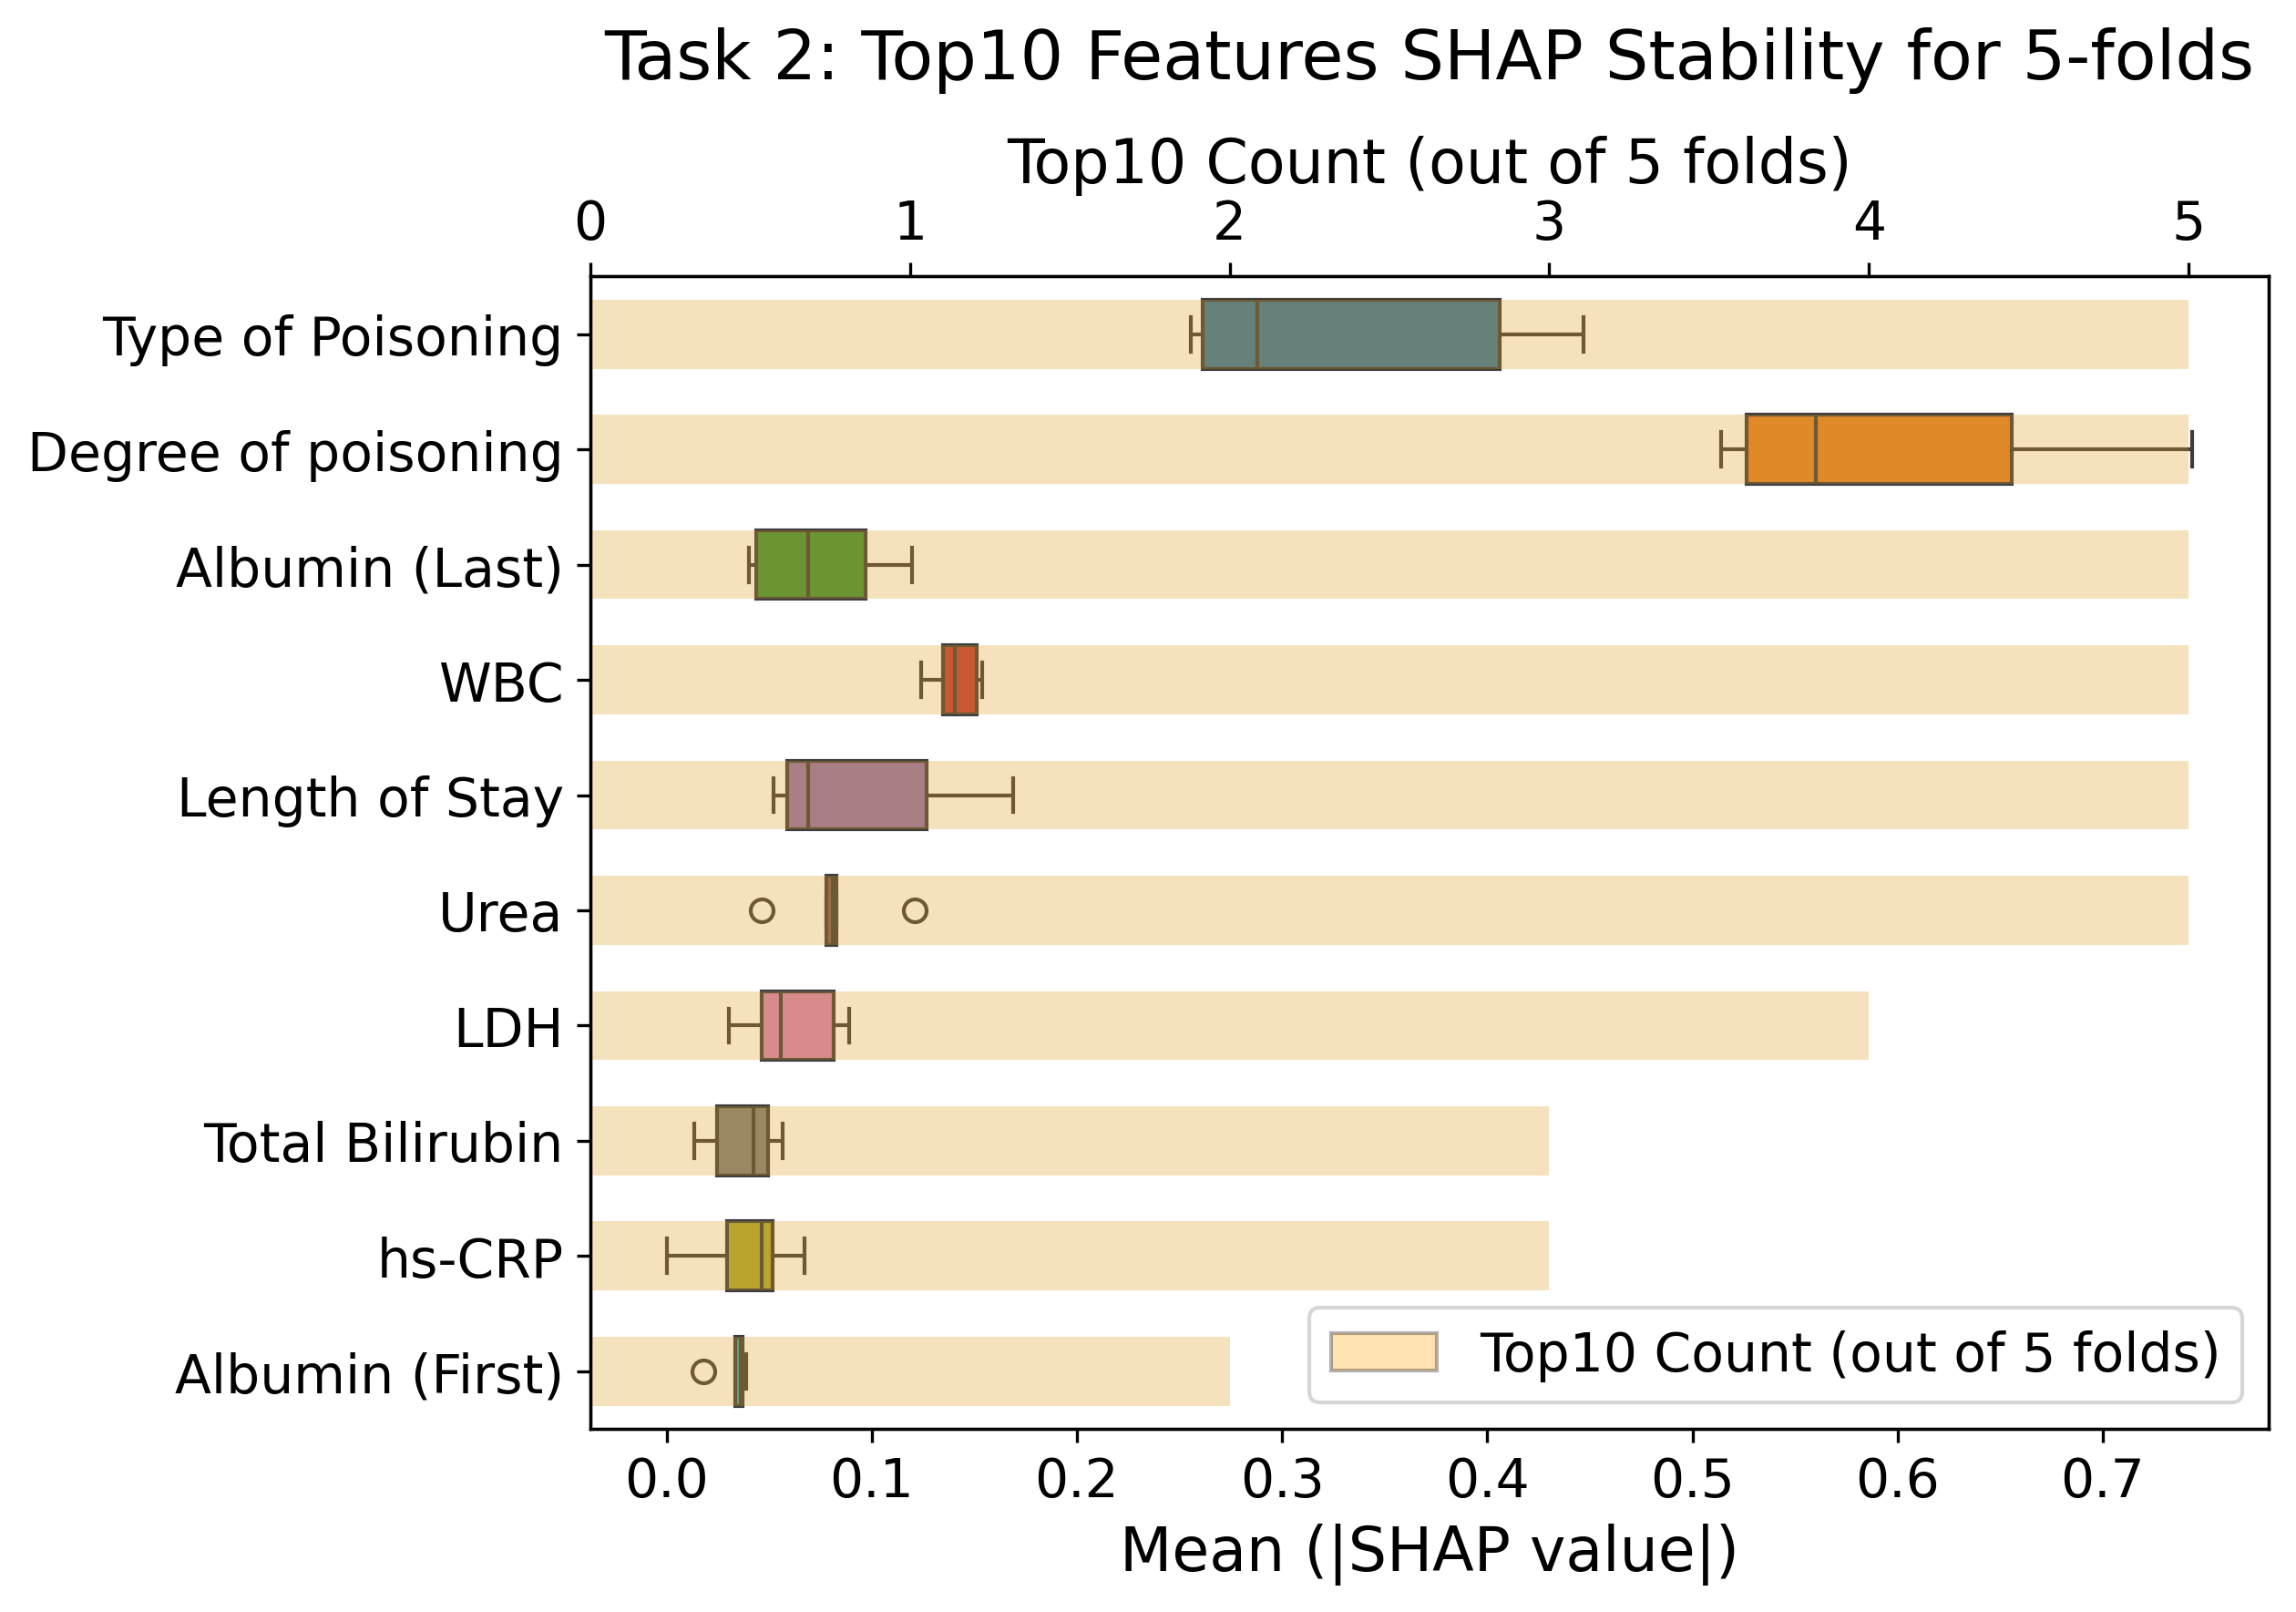

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

name = 'Task 2'

rename_dict = { 
    'degree of poisoning':'Degree of poisoning',
    'Altered Consciousness or Syncope': 'AMS or Sync',
    'White Blood Cell Count': 'WBC',
    'Red Blood Cell Count': 'RBC',
    'Hemoglobin Concentration': 'HGB',
    'Mean Corpuscular Volume': 'MCV',
    'Mean Corpuscular Hemoglobin': 'MCH',
    'Mean Corpuscular Hemoglobin Concentration': 'MCHC',
    'Alanine Aminotransferase (ALT)': 'ALT',
    'Lactate Dehydrogenase (LDH)': 'LDH',
    'Creatine Kinase (CK)': 'Creatine Kinase',
    'Creatine Kinase-MB Isoenzyme': 'CK-MB',
    'High-Sensitivity C-Reactive Protein (hs-CRP)': 'hs-CRP',
    'Blood Cholinesterase Test Results': 'Cholinesterase',
    'Number of Hemoperfusion Sessions': 'Hemoperfusion Count',
    'Number of Blood Purification Sessions': 'Blood Purification Count',
    'Albumin (First Measurement)':'Albumin (First)',
    'Albumin (Last Measurement)':'Albumin (Last)',
}

feature_topk_df = pd.read_csv('/home/mailiyi/Poisoning_Prediction/prediction_plot/shap_non-recovery_stability analyses/feature_top10_stability.csv')

top10_features = feature_topk_df.sort_values("Top10_Count", ascending=False).head(10)

top10_features['Feature_Rename'] = top10_features['Feature'].map(rename_dict).fillna(top10_features['Feature'])

# ===================== plot =====================
plt.figure(figsize=(8.5, 6),dpi=300)  

fold_cols = ["Fold1_MeanAbsSHAP","Fold2_MeanAbsSHAP","Fold3_MeanAbsSHAP","Fold4_MeanAbsSHAP","Fold5_MeanAbsSHAP"]
box_data = top10_features[fold_cols].values.T 

sns.boxplot(data=box_data, orient='h', width=0.6)
# plt.yticks(range(len(top10_features)), top10_features["Feature"], fontsize=14) 
plt.yticks(range(len(top10_features)), top10_features["Feature_Rename"], fontsize=14) 
plt.xticks(fontsize=14)
plt.xlabel("Mean (|SHAP value|)", fontsize=16)
plt.title(f"{name}: Top10 Features SHAP Stability for 5-folds", fontsize=18, pad=15)

ax2 = plt.twiny() 
sns.barplot(y=range(len(top10_features)), x=top10_features["Top10_Count"], 
            alpha=0.3, color="orange", ax=ax2, orient='h', width=0.6)
ax2.set_xlabel("Top10 Count (out of 5 folds)", fontsize=16)
ax2.tick_params(axis='x', labelsize=14)

bar_legend = Patch(facecolor='orange', edgecolor='black', alpha=0.3, label='Top10 Count (out of 5 folds)')
plt.legend(handles=[bar_legend], loc='lower right', fontsize=14)

plt.tight_layout()
plt.show()


## SHAP Trend Chart: Used for OR Value Comparison

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split
from catboost import CatBoostClassifier, Pool
import shap
import matplotlib.pyplot as plt

def train_catboost_5fold_cv_shap_total(
    dataX,
    dataY,
    cat_features=None,
    seed=9762,
    early_stopping_rounds=30,
    params={'depth': 5, 'iterations': 200, 'learning_rate': 0.05}
):
    """
    plot_patient_shap_by_hospital_id():
    - shap_values
    - explainer
    - pred_result（ Hospital ID and y_pred）
    - X
    - best_model
    """

    dataX = dataX.copy()
    
    if 'Hospital ID' not in dataX.columns:
        raise ValueError("dataX must contain 'Hospital ID' column。")
    
    hospital_ids = dataX['Hospital ID'].values

    if cat_features is not None:
        for c in cat_features:
            dataX[c] = dataX[c].astype(str).fillna("missing")
    
    X = dataX.drop(columns=['Hospital ID'])
    y = np.array(dataY)
    
    print(f"\n===== : {params} =====")
    
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    fold_metrics = []
    models = []
    all_pred = []

    fold_idx = 1
    for train_val_index, test_index in kf.split(X):
        X_train_val, X_test = X.iloc[train_val_index], X.iloc[test_index]
        y_train_val, y_test = y[train_val_index], y[test_index]

        test_hid = hospital_ids[test_index]

        # Train / val split
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val, y_train_val,
            test_size=1/8, random_state=seed, stratify=y_train_val
        )

        # imbalance weight
        num_pos = np.sum(y_train == 1)
        num_neg = np.sum(y_train == 0)
        scale_pos_weight = num_neg / max(num_pos, 1)

        train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
        val_pool   = Pool(X_val, label=y_val,   cat_features=cat_features)
        test_pool  = Pool(X_test, label=y_test,  cat_features=cat_features)

        model = CatBoostClassifier(
            **params,
            loss_function="Logloss",
            eval_metric="AUC",
            scale_pos_weight=scale_pos_weight,
            random_seed=seed,
            verbose=False
        )

        model.fit(train_pool, eval_set=val_pool,
                  early_stopping_rounds=early_stopping_rounds, verbose=False)

        y_pred_prob = model.predict_proba(test_pool)[:, 1]
        auroc = metrics.roc_auc_score(y_test, y_pred_prob)
        print(f"Fold {fold_idx} AUROC = {auroc:.4f}")

        fold_metrics.append(auroc)
        models.append(model)


        all_pred.append(pd.DataFrame({
            "Hospital ID": test_hid,
            "y_test": y_test,
            "y_pred": y_pred_prob
        }))

        fold_idx += 1

    pred_result = pd.concat(all_pred, ignore_index=True)

    best_fold = int(np.argmax(fold_metrics))
    best_model = models[best_fold]
    print(f"\n===== Fold {best_fold + 1}, AUROC={fold_metrics[best_fold]:.4f} =====")

    # ===== SHAP =====
    explainer = shap.TreeExplainer(best_model)
    shap_expl = explainer(X)
    shap_values = shap_expl.values 

    return {
        "best_model": best_model,
        "explainer": explainer,
        "shap_values": shap_values,    
        "X": X,
        "pred_result": pred_result     
    }

rename_dict = { 
    'degree of poisoning':'Degree of poisoning',
    'Altered Consciousness or Syncope': 'AMS or Sync',
    'White Blood Cell Count': 'WBC',
    'Red Blood Cell Count': 'RBC',
    'Hemoglobin Concentration': 'HGB',
    'Mean Corpuscular Volume': 'MCV',
    'Mean Corpuscular Hemoglobin': 'MCH',
    'Mean Corpuscular Hemoglobin Concentration': 'MCHC',
    'Alanine Aminotransferase (ALT)': 'ALT',
    'Lactate Dehydrogenase (LDH)': 'LDH',
    'Creatine Kinase (CK)': 'Creatine Kinase',
    'Creatine Kinase-MB Isoenzyme': 'CK-MB',
    'High-Sensitivity C-Reactive Protein (hs-CRP)': 'hs-CRP',
    'Blood Cholinesterase Test Results': 'Cholinesterase',
    'Number of Hemoperfusion Sessions': 'Hemoperfusion Count',
    'Number of Blood Purification Sessions': 'Blood Purification Count',
    'Albumin (First Measurement)':'Albumin (First)',
    'Albumin (Last Measurement)':'Albumin (Last)',
}



def plot_patient_shap_by_hospital_id(
        hospital_id,
        shap_values,
        explainer,
        X,
        pred_result,
        max_display=12,
        figsize=(3, 5),
        dpi=300
    ):
    """

    """

    if "Hospital ID" not in pred_result.columns:
        raise KeyError("pred_result must contain 'Hospital ID'")

    match_idx = pred_result.index[pred_result["Hospital ID"] == hospital_id].tolist()
    if len(match_idx) == 0:
        raise ValueError(f"Patient not found for Hospital ID = {hospital_id}")

    patient_idx = match_idx[0]

    prob = round(pred_result.loc[patient_idx, "y_pred"] * 100, 2)
    print(f"---------- 患者 {hospital_id} 的 28天院外死亡概率: {prob}% ----------")

    expected_value = explainer.expected_value

    if np.isscalar(expected_value):
        #  SHAP：shap_values shape = (n_samples, n_features)
        baseline = expected_value
        shap_row = shap_values[patient_idx]
    else:

        baseline = expected_value[1]
        shap_row = shap_values[1][patient_idx]

    feature_row = X.iloc[patient_idx].values
    feature_names = X.columns.to_numpy()

    mapped_feature_names = np.array([rename_dict.get(f, f) for f in feature_names])

    sorted_idx = np.argsort(-np.abs(shap_row))
    top_idx = sorted_idx[:max_display]

    explanation = shap.Explanation(
        values=shap_row[top_idx],
        base_values=baseline,
        data=feature_row[top_idx],
        feature_names=mapped_feature_names[top_idx]   
    )

    # ===================== 5. plot =====================
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    shap.plots.waterfall(explanation, max_display=max_display, show=False)
    for text in ax.texts:
        text.set_fontsize(12)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    plt.tight_layout()
    plt.show()
    return explanation




/home/mailiyi/.conda/envs/ml_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

def retrain_with_top_shap_features(result_dict, dataX, dataY, top_k=20, cat_features=None):

    best_model = result_dict["best_model"]
    X_full = result_dict["X"]
    
    shap_matrix = result_dict["shap_values"]
    feature_names = X_full.columns

    mean_abs_shap = np.abs(shap_matrix).mean(axis=0)
    top_indices = np.argsort(mean_abs_shap)[::-1][:top_k]
    selected_features = feature_names[top_indices].tolist()
    for i, feat in enumerate(selected_features, 1):
        print(f"{i}. {feat}")

    X_selected = dataX[selected_features].copy()

    if cat_features is not None:
        cat_features_selected = [c for c in cat_features if c in selected_features]
        for c in cat_features_selected:
            X_selected[c] = X_selected[c].astype(str).fillna("missing")
    else:
        cat_features_selected = None

    X_train, X_val, y_train, y_val = train_test_split(
        X_selected, dataY, test_size=0.2, random_state=9762, stratify=dataY
    )

    train_pool = Pool(X_train, label=y_train, cat_features=cat_features_selected)
    val_pool   = Pool(X_val,   label=y_val,   cat_features=cat_features_selected)

    params = {
        'depth': 5,
        'iterations': 200,
        'learning_rate': 0.05,
        'loss_function': "Logloss",
        'eval_metric': "AUC",
        'random_seed': 9762,
        'verbose': False
    }

    model = CatBoostClassifier(**params)
    model.fit(train_pool, eval_set=val_pool, verbose=False)

    val_pred = model.predict_proba(val_pool)[:, 1]
    auroc = roc_auc_score(y_val, val_pred)
    explainer = shap.TreeExplainer(model)
    shap_expl = explainer(X_selected)
    shap_values = shap_expl.values  # numpy array

    shap_df = pd.DataFrame(shap_values, columns=selected_features)

    return {
        "selected_features": selected_features,
        "cat_features_selected": cat_features_selected,
        "model": model,
        "explainer": explainer,
        "shap_values": shap_df,  
        "X_selected": X_selected,
        "auroc": auroc,
    }


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib.ticker import FuncFormatter

def format_func(value, tick_number):
    if value >= 1000:
        return f"{int(value/1000)}k"
    elif value >= 500:
        return f"{round(value/1000,1)}k"
    else:
        return str(int(value))


def plot_shap_dependence_lowess(
    X, shap_values,
    fname,
    title_name=None,
    frac=0.5, ## 平滑度
    lower_percentile=0,
    upper_percentile=95,
    shap_threshold=None,        
    figsize=(3.8, 2.8),
    dpi=300,
    dot_color='lightskyblue',
    line_color='lightcoral',
    hist_color='gray',
    hist_alpha=0.8,             
    bins=20,
    fontsize=9
):
    x = X[fname]
    s = shap_values[fname]

    lower_bound = np.nanpercentile(x, lower_percentile)
    upper_bound = np.nanpercentile(x, upper_percentile)
    valid_indices = np.where((x >= lower_bound) & (x <= upper_bound))[0]

    if shap_threshold is not None:
        valid_indices = valid_indices[s[valid_indices] <= shap_threshold]

    filtered_x = x[valid_indices]
    filtered_s = s[valid_indices]
    fig, axes = plt.subplots(1,1,figsize=figsize,dpi=dpi)
    smoothed = lowess(filtered_s, filtered_x, frac=frac, return_sorted=True)
    ax2 = axes.twinx()

    counts, bins_edges = np.histogram(filtered_x, bins=bins)
    width = np.diff(bins_edges)
    ax2.bar(
        bins_edges[:-1],
        counts,
        width=width,
        color=hist_color,
        alpha=hist_alpha,
        zorder=0,
        align='edge'
    )
    ax2.set_ylabel('Count', fontsize=fontsize)
    ax2.tick_params(axis='y', labelsize=fontsize)
    ax2.yaxis.set_major_formatter(FuncFormatter(format_func))
    axes.scatter(
        filtered_x,
        filtered_s,
        c=dot_color,
        marker='.',
        s=30,
        alpha=1,
        label='Patient-level SHAP values', ## Individual SHAP Values
        zorder=1
    )
    axes.plot(
        smoothed[:,0],
        smoothed[:,1],
        color=line_color,
        lw=2,
        # label='Smoothed SHAP Trend',
        zorder=2
    )
    axes.axhline(y=0, linestyle='--', color='black', alpha=0.3)
    axes.set_ylabel('SHAP value', fontsize=fontsize)
    axes.tick_params(axis='x', labelsize=fontsize)
    axes.tick_params(axis='y', labelsize=fontsize)
    handles1, labels1 = axes.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    axes.legend(
        handles1 + handles2,
        labels1 + labels2,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.1),
        # ncol=len(handles1 + handles2),
        ncol=1,              
        fontsize=fontsize,
        frameon=False,
        markerscale=1.5   
    )

    if title_name is None:
        title_name = fname
    plt.title(title_name, fontsize=fontsize+2)

    plt.tight_layout()
    plt.show()


In [ ]:
dataX = df_mapped_wide[['Hospital ID']+features_categorical + features_continuous]
dataY = df_mapped_wide['Outcome']  

In [20]:
result = train_catboost_5fold_cv_shap_total(dataX, dataY, cat_features=features_categorical)

top_result = retrain_with_top_shap_features(
    result,
    dataX,
    dataY,
    top_k=30,
    cat_features=features_categorical
)


===== 使用固定参数: {'depth': 5, 'iterations': 200, 'learning_rate': 0.05} =====
Fold 1 AUROC = 0.8121
Fold 2 AUROC = 0.8414
Fold 3 AUROC = 0.8005
Fold 4 AUROC = 0.8305
Fold 5 AUROC = 0.7664

===== 最优模型来自 Fold 2, AUROC=0.8414 =====
计算 SHAP（使用全体样本）...

===== 基于最优模型的 SHAP 选出 Top30 特征 =====
Top 30 特征：
1. degree of poisoning
2. Type of Poisoning
3. White Blood Cell Count
4. Length of Stay
5. Urea
6. Lactate Dehydrogenase (LDH)
7. High-Sensitivity C-Reactive Protein (hs-CRP)
8. Headache
9. Albumin (Last Measurement)
10. Creatine Kinase-MB Isoenzyme
11. Creatine Kinase (CK)
12. Blood Cholinesterase Test Results
13. Systolic Blood Pressure
14. Heart Rate
15. Age
16. Heart Disease
17. Diastolic Blood Pressure
18. Albumin (First Measurement)
19. Number of Blood Purification Sessions
20. Mean Corpuscular Hemoglobin
21. Homocysteine
22. Cerebrovascular Disease
23. Poisoning
24. Mean Platelet Volume
25. Altered Consciousness or Syncope
26. Total Bilirubin
27. Red Blood Cell Count
28. Platelet Count
29.

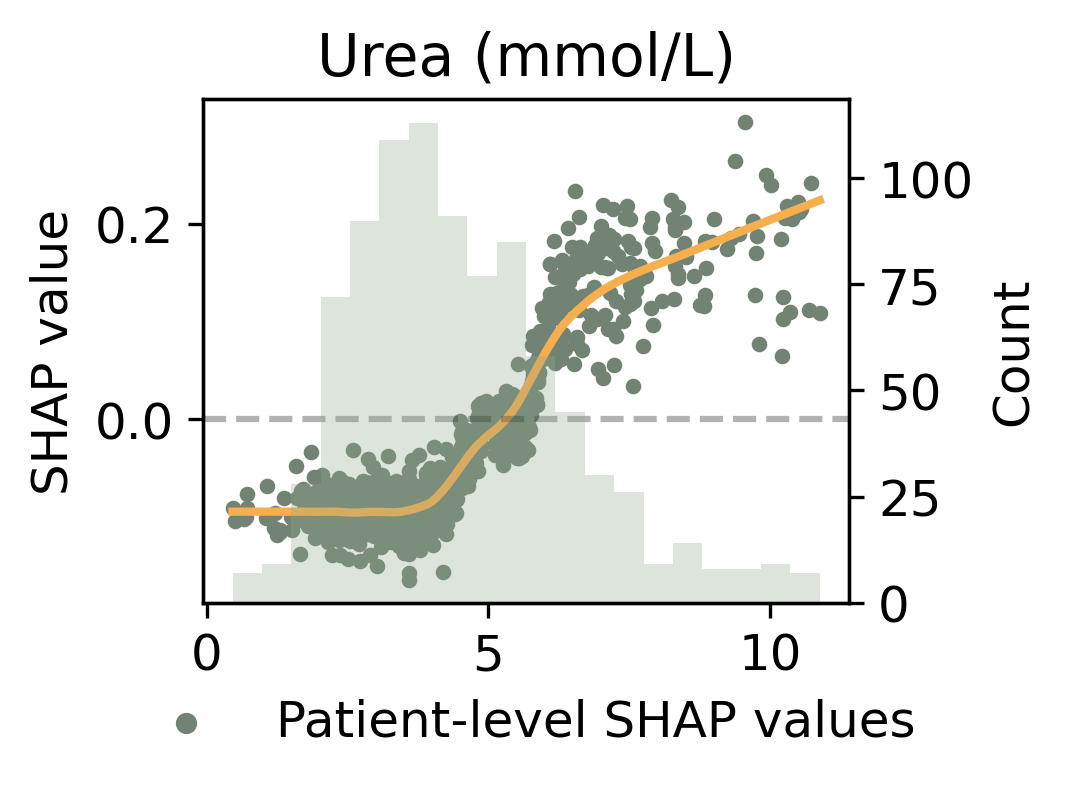

In [ ]:
plot_shap_dependence_lowess(
    X=top_result["X_selected"],
    shap_values=top_result["shap_values"],
    fname='Urea',
    title_name='Urea (mmol/L)',
    frac=0.3, 
    lower_percentile=0,
    upper_percentile=95,
    # shap_threshold=0.3,        
    dot_color='#728374',
    line_color='#F6AF4E',
    hist_color="#90A88C",   
    fontsize=12,
    hist_alpha=0.3,
    bins=20,
)

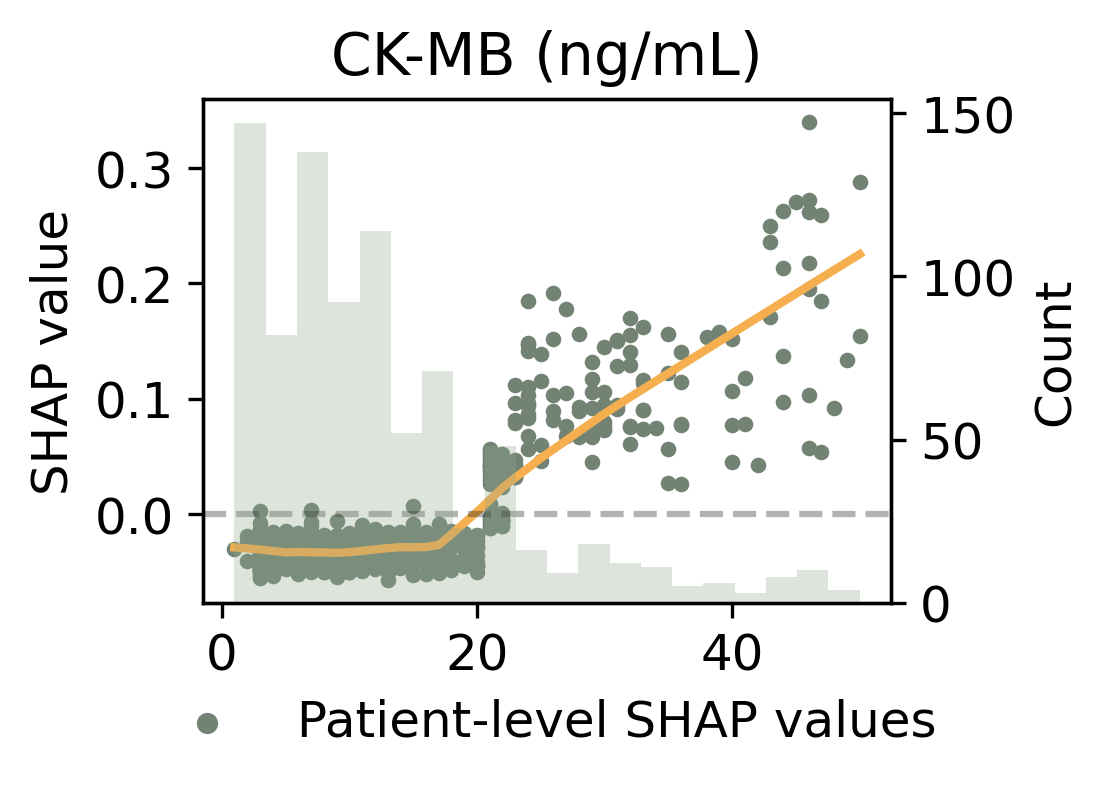

In [ ]:
plot_shap_dependence_lowess(
    X=top_result["X_selected"],
    shap_values=top_result["shap_values"],
    fname='Creatine Kinase-MB Isoenzyme',
    title_name='CK-MB (ng/mL)',
    frac=0.3, 
    lower_percentile=0,
    upper_percentile=95,
    # shap_threshold=0.3,        
    dot_color='#728374',
    line_color='#F6AF4E',
    hist_color="#90A88C",   
    fontsize=12,
    hist_alpha=0.3,
    bins=20,
)

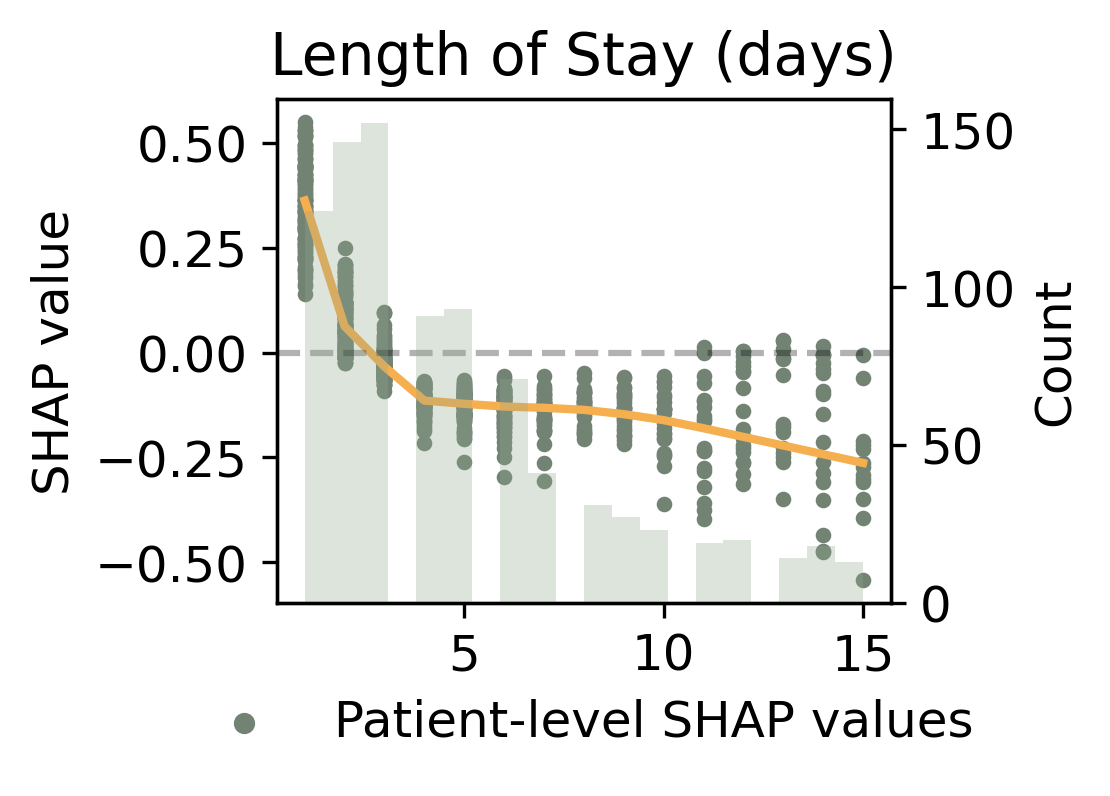

In [ ]:
plot_shap_dependence_lowess(
    X=top_result["X_selected"],
    shap_values=top_result["shap_values"],
    fname='Length of Stay',
    title_name='Length of Stay (days)',
    frac=0.3, 
    lower_percentile=0,
    upper_percentile=95,
    # shap_threshold=0.3,        
    dot_color='#728374',
    line_color='#F6AF4E',
    hist_color="#90A88C",  
    fontsize=12,
    hist_alpha=0.3,
    bins=20,
)


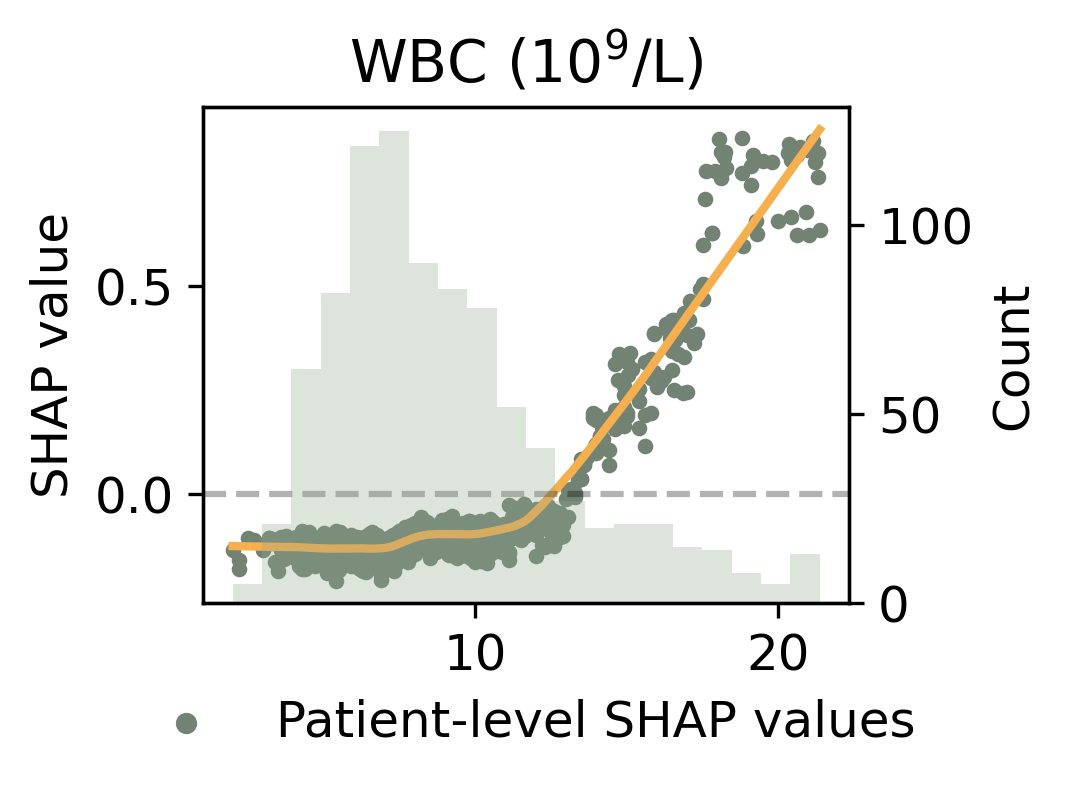

In [ ]:
plot_shap_dependence_lowess(
    X=top_result["X_selected"],
    shap_values=top_result["shap_values"],
    fname='White Blood Cell Count',
    # title_name='d2. WBC (10⁹/L)',
    title_name = r'WBC (10$^9$/L)', 
    frac=0.3, ## 平滑度
    lower_percentile=0,
    upper_percentile=95,
    # shap_threshold=0.3,        
    dot_color='#728374',
    line_color='#F6AF4E',
    hist_color="#90A88C",   
    fontsize=12,
    hist_alpha=0.3,
    bins=20,
)
